In [1]:
import sys
sys.path.append('../')

from TextLabeller import *

/Users/dc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Read sentences from csv file 
FAKE_TEXT = "analysis_jaccard/jaccard_labelled_fake_text.csv"
REAL_TEXT = "analysis_jaccard/jaccard_labelled_real_text.csv"

import pandas as pd
fake_text = pd.read_csv(FAKE_TEXT, index_col=0)
real_text = pd.read_csv(REAL_TEXT, index_col=0)

fake_text.head(3)

,text,novelty,diversity,label
index,,,,
0,the scottish government has won and not necess...,0.718750,0.645161,0
1,the more of the main people do not to not pay ...,0.666667,0.586207,0
2,"it was a shame , but when they put it up for h...",0.676471,0.612903,0


In [28]:
# sentences = fake_text['text'].str.split(' ').apply(len).value_counts().plot.hist()

# sentences.head(3)

words = [x.split(' ') for x in fake_text['text'].tolist()]

words_lens = [len(x.split()) for x in words]
print("min: {}, max: {}".format(min(words_lens), max(words_lens)))

filter(lambda x : x > 20, words_lens)

import matplotlib.pyplot as plt

plt.hist(list(filter(lambda x : x > 20, words_lens)), bins=20)
plt.ylabel('No of times')
plt.show()

AttributeError: 'list' object has no attribute 'split'

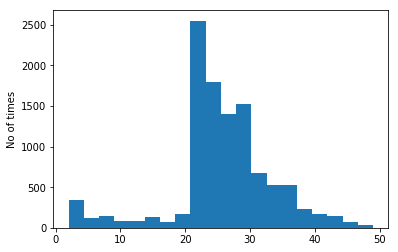

In [22]:
words = [len(x.split()) for x in real_text['text'].tolist()]

import matplotlib.pyplot as plt

plt.hist(words, bins=20)
plt.ylabel('No of times')
plt.show()